In [100]:
#!pip install tensorflow==2.0.0

In [1]:
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from keras.models import Sequential
#from keras.layers import Convolution2D
from keras.layers import Conv2D
from keras.layers import Activation
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import load_model
from keras import metrics
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model


E:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

In [5]:
#train_dir =r'Train'
#test_dir = r'Test'
train_dir = r'Soil_Dataset\Train'
test_dir = r'Soil_Dataset\Test'

image_size = 224

In [6]:
batch_size = 32

train_datagen = ImageDataGenerator(rescale = 1./255,
                            rotation_range=45,
                            zoom_range=0.40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.15,
                            horizontal_flip=True,
                            vertical_flip= True)
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              color_mode="rgb",
                                              shuffle=True,
                                              batch_size=32,
                                              class_mode="categorical")

Found 762 images belonging to 5 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            color_mode="rgb",
                                            shuffle=True,
                                            class_mode="categorical")

Found 219 images belonging to 5 classes.


In [10]:

model = Sequential(name="SoilNet")
model.add(Conv2D(16, (3, 3), padding="same",input_shape=(224,224,3)))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(3, 3),padding="same"))
model.add(Dropout(0.20))

model.add(Conv2D(32, (4, 4), padding="same"))
model.add(Activation("relu"))

model.add(Conv2D(64, (4, 4), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model.add(Dropout(0.20))

model.add(Conv2D(128, (4, 4), padding="same"))
model.add(Activation("relu"))

model.add(Conv2D(128, (4, 4), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation("softmax"))




In [11]:
#import pydot
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
# reduction_lr = ReduceLROnPlateau(monitor = "val_loss",patience = 1 ,verbose = 1, factor = 0.1, min_lr = 0.00001)
reduction_lr = ReduceLROnPlateau(monitor = "val_accuracy",patience = 2 , factor = 0.2, min_lr = 0.0001)
model.summary()
plot_model(model,show_shapes=True)

Model: "SoilNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
activation_7 (Activation)    (None, 224, 224, 16)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 32)        8224      
_________________________________________________________________
activation_8 (Activation)    (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 75, 75, 64)        3283

In [12]:
callback_list = [reduction_lr]

In [13]:
start = time.time()

# history = model.fit_generator(train_data,
#                     steps_per_epoch = 30,
#                     validation_data = test_data,
#                     validation_steps = 30,
#                     epochs=25,
#                     callbacks = callback_list)
history = model.fit_generator(train_data,
                    steps_per_epoch = 30,
                    validation_data = test_data,
                    validation_steps = 30,
                    epochs=25,
                    callbacks = callback_list)
end = time.time()
print("Total train time: ",(end-start)/60," mins")


Epoch 1/25
30/30 [==============================] - 335s 11s/step - loss: 2.2250 - accuracy: 0.6195 - val_loss: 13.3761 - val_accuracy: 0.4372
Epoch 2/25
30/30 [==============================] - 108s 4s/step - loss: 0.9268 - accuracy: 0.7096 - val_loss: 2.7668 - val_accuracy: 0.4957
Epoch 3/25
30/30 [==============================] - 106s 4s/step - loss: 0.7989 - accuracy: 0.7416 - val_loss: 6.9421 - val_accuracy: 0.3957
Epoch 4/25
30/30 [==============================] - 108s 4s/step - loss: 0.6628 - accuracy: 0.7725 - val_loss: 3.2473 - val_accuracy: 0.4663
Epoch 5/25
30/30 [==============================] - 106s 4s/step - loss: 0.6972 - accuracy: 0.7820 - val_loss: 1.1687 - val_accuracy: 0.6585
Epoch 6/25
30/30 [==============================] - 106s 4s/step - loss: 0.5435 - accuracy: 0.8291 - val_loss: 1.4906 - val_accuracy: 0.6479
Epoch 7/25
30/30 [==============================] - 108s 4s/step - loss: 0.5118 - accuracy: 0.8376 - val_loss: 1.3021 - val_accuracy: 0.7144
Epoch 8/25

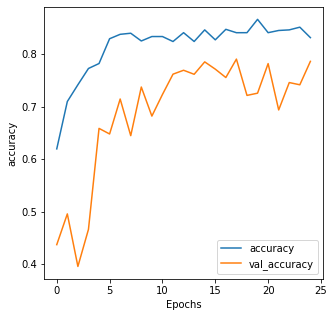

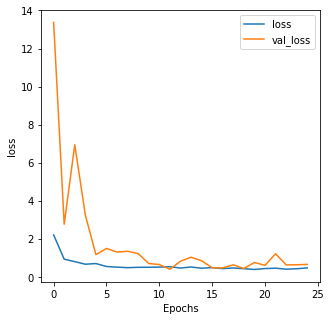

In [14]:
def plot_graph(history,string):
    plt.figure(figsize=(5,5))
    plt.plot(history.history[string],label=str(string))
    plt.plot(history.history["val_"+str(string)],label="val_"+str(string))
    plt.xlabel("Epochs")
    plt.ylabel(str(string))
    plt.legend()
    plt.show()
plot_graph(history,'accuracy')
plot_graph(history,'loss')


In [17]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
dir_path=r'Test1\2.jpg'

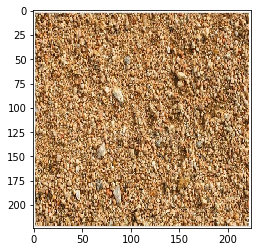

float32
[[0.         0.         0.5419846  0.         0.45801532]]
preds.argmax(axis=1) [2]


In [18]:
img=image.load_img(dir_path,target_size=(224,224))
plt.imshow(img)
plt.show()
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
val=model.predict(images)
print(val.dtype)
print(val)
print ("preds.argmax(axis=1)",val.argmax(axis=1))

In [19]:
i = val.argmax(axis=1)[0]
if i==0:
        print("Alluvial")
elif i==1:
        print("Black")
elif i==2:
        print("Clay")
elif i==3:
        print("Red")
elif i==4:
        print("Sandy")


Clay


In [20]:
print("Recommended Crops are:")
if i==0:
    print("Rice, wheat, sugarcane, tobacco, maize, cotton, soybean, jute, oilseeds, fruits, vegetables")
elif i==1:
    print("Cotton, wheat, jowar, linseed, Virginia tobacco, castor, sunflower, millets, Rice and sugarcane")
elif i==2:
    print("Lettuce, chard, snap beans,broccoli, Brussels sprouts and cabbage")
elif i==3:
    print("cotton, wheat, rice, pulses, millets, tobacco, oilseeds, potatoes, and fruits")
elif i==4:
    print("Carrots, Radishes, Potatoes, Lettuce, Collard greens, Tomatoes, Zucchini, Corn, Asparagus, Watermelon, Beans,Cucumber, Thyme, Rosemary, and Oregano")

Recommended Crops are:
Lettuce, chard, snap beans,broccoli, Brussels sprouts and cabbage


In [21]:
#pip install pydot

In [22]:
model.save("SoilClassifier1.h5")

In [23]:
# import pickle
# filename = 'finalized_model.sav'
# pickle.dump(model, open(filename, 'wb'))

In [24]:
import joblib
filename = 'finalized_model.h5'
joblib.dump(model, filename)

['finalized_model.h5']